# TENGO NUEVO TEMA...

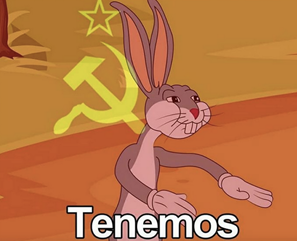

QUE ES EL APRENDIZAJE NO SUPERVISADO

In [ ]:
"""
El aprendizaje no supervisado (unsupervised learning) es una rama del aprendizaje
automático (AA) donde un algoritmo se entrena utilizando datos de entrada
que no están etiquetados.

A diferencia del aprendizaje supervisado, donde se le dice al modelo la respuesta
correcta para cada ejemplo (la "etiqueta"), en el aprendizaje no supervisado
el modelo tiene que trabajar por sí mismo para encontrar la estructura
oculta, patrones y relaciones dentro de los datos.
"""

CASOS DE USOS

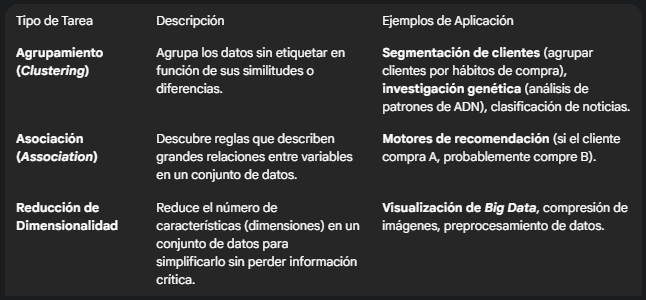

# ANALISIS DE AGRUPAMIENTO (CLUSTERING)

In [ ]:
"""
El clustering es una técnica de minería de datos que tiene como objetivo dividir
un conjunto de datos en grupos (o clústeres) de tal manera que los objetos en
el mismo grupo sean más similares entre sí que a los de otros grupos.

El algoritmo realiza esta división basándose únicamente en las características
intrínsecas de los datos de entrada, sin ninguna etiqueta previa que le diga
a qué grupo deben pertenecer
"""

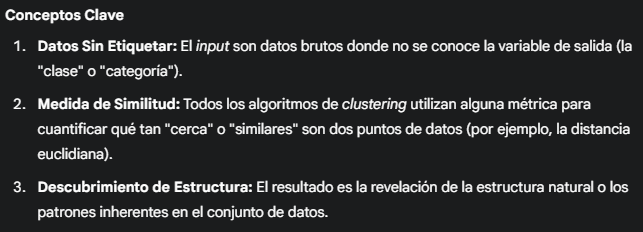

TIPOS DE ALGORITMOS DE CLUSTERING

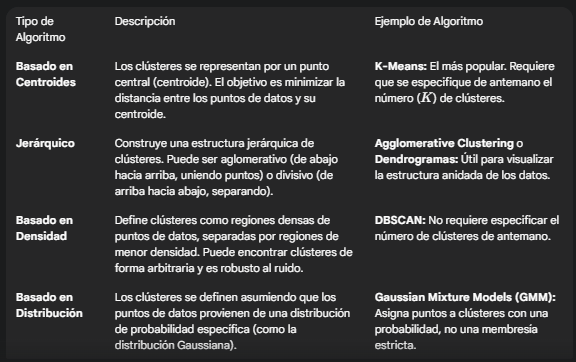

UNA FORMA MAS FACIL DE VERLO

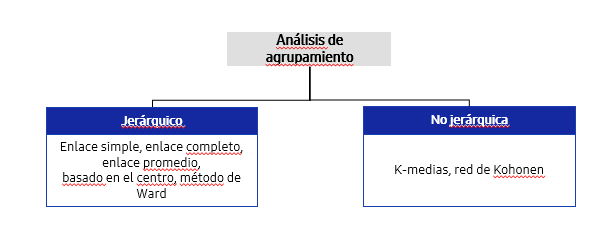

AGRUPACION JERARQUICA (AGLOMERACION)

In [ ]:
"""
Se comienza con N puntos de datos, y cada uno se considera un clúster individual.
Se calcula la distancia (similitud) entre todos los pares de puntos de datos.
"""

"""
Se mide la "distancia" entre todos los clústeres existentes utilizando
una métrica de enlace y se unen los dos clústeres con la distancia más pequeña.

El nuevo clúster se trata como una sola entidad para los siguientes
cálculos de distancia.
"""

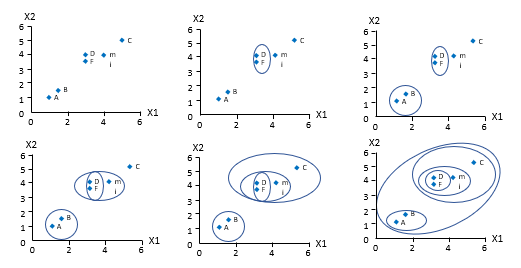

In [ ]:
"""
El proceso termina cuando solo queda un clúster que contiene todos los
puntos de datos originales.
"""

QUE SON LAS METRICAS DE ENLACE...

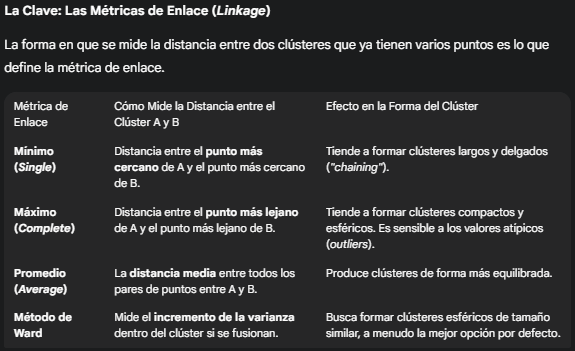

# COMO LUCE ESO 😐

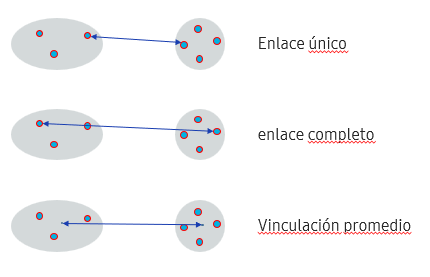

EJEMPLO PARTICULAR

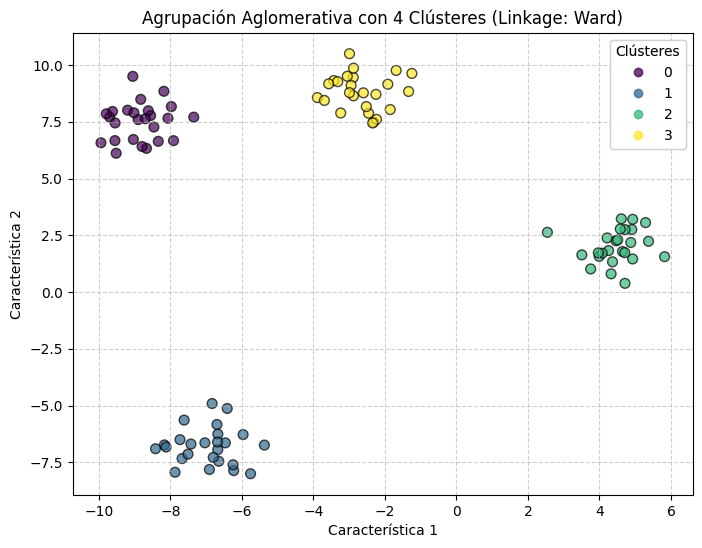

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# --- 1. Generación de Datos de Ejemplo ---
# Generamos 100 puntos de datos, agrupados naturalmente en 4 "blobs"
X, y_true = make_blobs(n_samples=100, centers=4, cluster_std=0.8, random_state=42)

# --- 2. Aplicación del Modelo AgglomerativeClustering ---
# Definimos el número de clústeres deseado (n_clusters = 4)
n_clusters_deseado = 4

# Creamos y entrenamos el modelo de Agrupación Aglomerativa
# n_clusters: el número de grupos que queremos cortar del dendrograma implícito.
# linkage: el criterio de fusión (usaremos 'ward', el más común para datos esféricos).
modelo_aglomerativo = AgglomerativeClustering(
    n_clusters=n_clusters_deseado,
    linkage='ward'
)

# El modelo se "entrena" y predice las etiquetas (a qué clúster pertenece cada punto)
etiquetas_cluster = modelo_aglomerativo.fit_predict(X)

# --- 3. Visualización de los Clústeres ---
plt.figure(figsize=(8, 6))
plt.title(f'Agrupación Aglomerativa con {n_clusters_deseado} Clústeres (Linkage: Ward)')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')

# Graficar los puntos, coloreándolos según las etiquetas asignadas por el modelo
scatter = plt.scatter(X[:, 0], X[:, 1], c=etiquetas_cluster, cmap='viridis', s=50, edgecolors='k', alpha=0.7)

# Agregar leyenda para los clústeres
legend1 = plt.legend(*scatter.legend_elements(), title="Clústeres")
plt.gca().add_artist(legend1)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

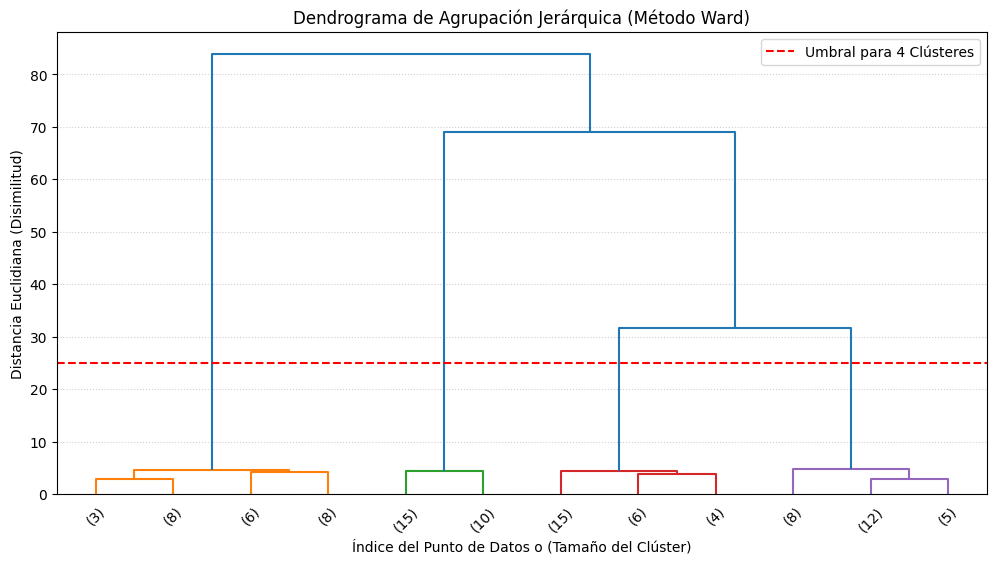

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# --- 1. Generación de los Mismos Datos de Ejemplo ---
# Generamos 100 puntos de datos, agrupados naturalmente en 4 "blobs"
X, y_true = make_blobs(n_samples=100, centers=4, cluster_std=0.8, random_state=42)

# --- 2. Aplicación del Proceso de Enlace (Linkage) ---
# Usamos la función 'linkage' de SciPy para calcular el historial de fusiones.
# El método 'ward' es el mismo que usamos en el modelo AgglomerativeClustering anterior.
Z = linkage(X, method='ward')

# --- 3. Visualización con el Dendrograma ---
plt.figure(figsize=(12, 6))
plt.title('Dendrograma de Agrupación Jerárquica (Método Ward)')
plt.xlabel('Índice del Punto de Datos o (Tamaño del Clúster)')
plt.ylabel('Distancia Euclidiana (Disimilitud)')

# Dibuja el dendrograma a partir de la matriz de enlaces Z.
# truncate_mode='lastp' y p=12 se usan para mantener el gráfico legible,
# mostrando solo las últimas 12 uniones y resumiendo el resto.
dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=45.,
    leaf_font_size=10.,
    color_threshold=25, # Coloriza las ramas por encima de cierta distancia
)

# --- 4. Añadir la Línea de Corte para 4 Clústeres ---
# Buscamos una distancia que cruce 4 ramas.
# En este ejemplo, una distancia de y=25 es un buen umbral.
plt.axhline(y=25, color='r', linestyle='--', label='Umbral para 4 Clústeres')
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

# QUE ES UN DENDOGRAMA... 😐

In [ ]:
"""
Un dendrograma es un diagrama de árbol utilizado para ilustrar la disposición
de los clústeres producidos por la agrupación jerárquica.

Su propósito principal es mostrar la secuencia de fusiones o divisiones y
la distancia a la que ocurrieron, permitiéndonos entender las relaciones
anidadas entre los grupos.
"""

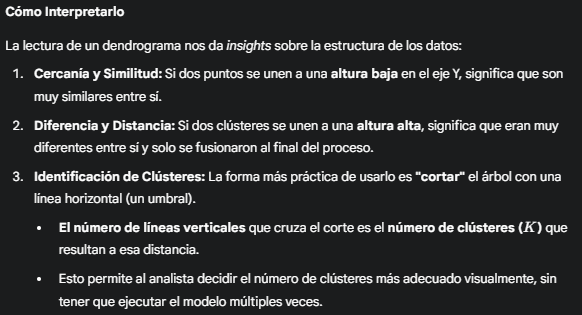

ESTO ES LO UNICO QUE TENEMOS DEL APRENDIZAJE NO SUPERVISADO...
RESPUESTA:

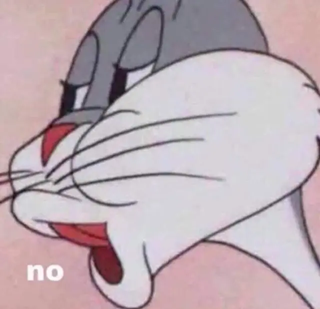

# ALGORITMOS NO JERARQUICOS (K-MEANS)

In [ ]:
"""
El objetivo del algoritmo K-Means es particionar N puntos de datos en K
clústeres, donde cada punto pertenece al clúster cuyo centroide (media)
es el más cercano.
"""

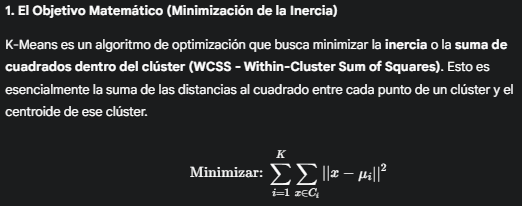

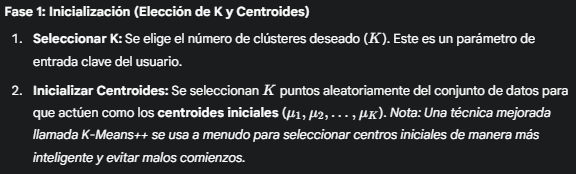

COMO SELECCIONAR LOS CENTROIDES

In [ ]:
"""
K-Means++ es un algoritmo de inicialización inteligente propuesto en 2007 que
está diseñado específicamente para seleccionar centroides que están bien
dispersos entre sí, lo que acelera la convergencia y produce mejores
resultados finales.
"""

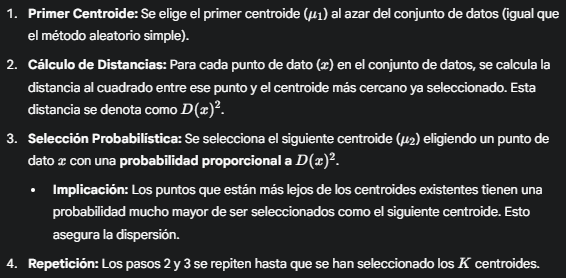

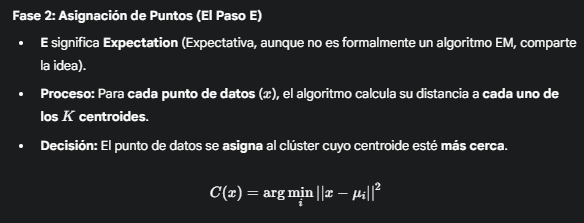

In [ ]:
"""
El Algoritmo EM (del inglés Expectation-Maximization, que significa Esperanza-Maximización)

es una técnica iterativa utilizada para encontrar las estimaciones de máxima verosimilitud
de los parámetros en modelos estadísticos cuando los datos dependen de variables
latentes no observadas o datos faltantes.
"""

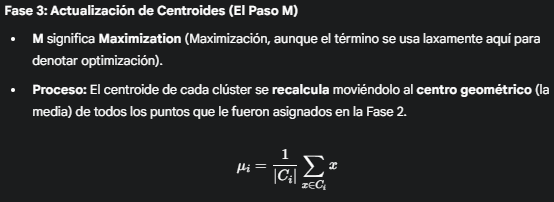

# CENTRO GEOMETRICO... 😐

In [ ]:
"""
El centro geométrico, o centroide, es el punto que representa el centro de masa
o la posición promedio de un conjunto de puntos en un espacio multidimensional.
"""

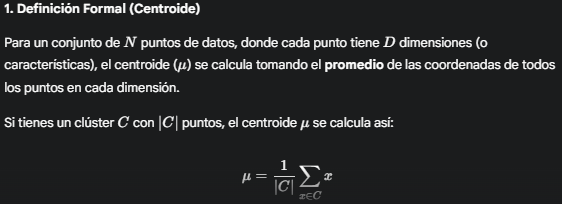

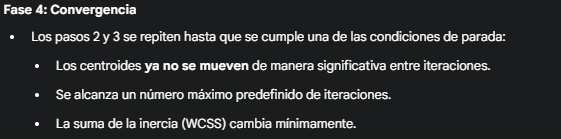

# COMO ELEGIR EL HIPERPARAMETRO K... 😐

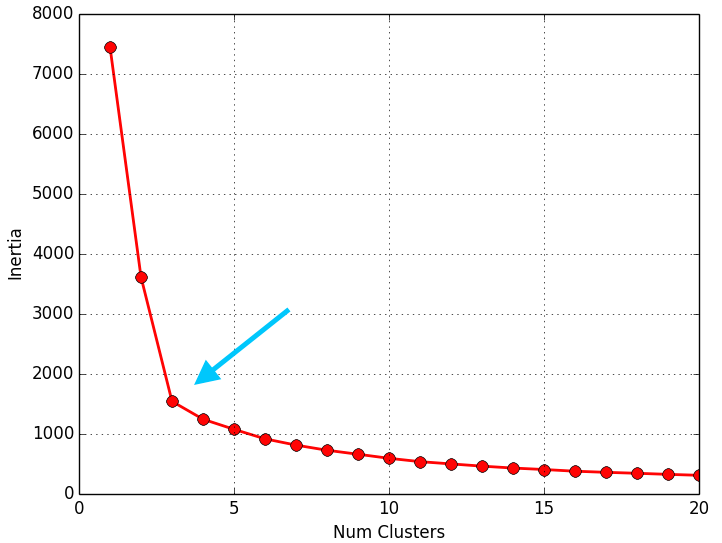

OTROS ALGORITMO NO JERARQUICOS

ALGORITMO DBSCAN

In [ ]:
"""
A diferencia de K-Means, que agrupa los puntos basados en la distancia a un
centroide, DBSCAN agrupa los puntos que están densamente agrupados, marcando
como ruido o outliers aquellos que se encuentran en regiones de baja densidad
"""

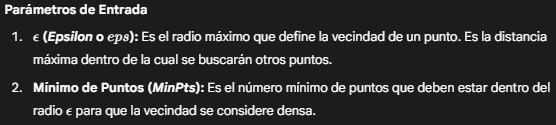

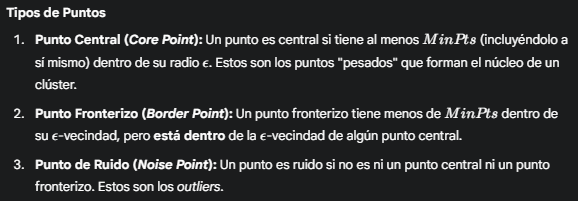

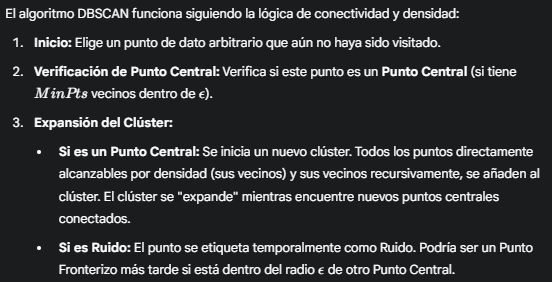

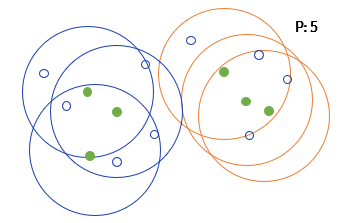

EJEMPLO DE ARBOL DE DECISION

Cargando y preparando datos...
Tamaño de entrenamiento: 120 muestras
Tamaño de prueba: 30 muestras

Entrenando el Árbol de Decisión...
Entrenamiento completado.

Evaluando el rendimiento...
Precisión (Accuracy) del modelo en el conjunto de prueba: 0.9333

Generando la visualización del árbol...


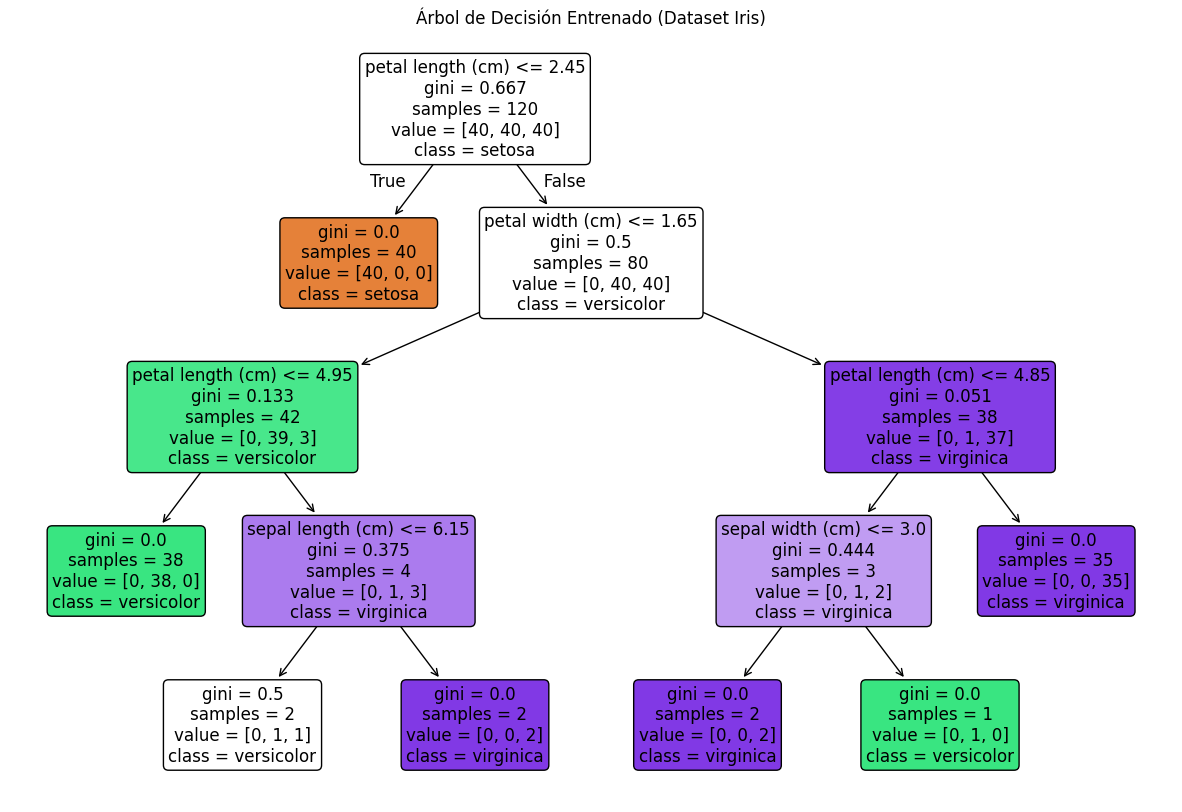

Fin del script.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- 1. Cargar y Preparar los Datos ---
print("Cargando y preparando datos...")
iris = load_iris()
X = iris.data       # Características (longitud y anchura de sépalo/pétalo)
y = iris.target     # Variable objetivo (clase de flor: setosa, versicolor, virginica)
feature_names = iris.feature_names
target_names = iris.target_names

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Tamaño de entrenamiento: {len(X_train)} muestras")
print(f"Tamaño de prueba: {len(X_test)} muestras\n")


# --- 2. Crear y Entrenar el Modelo ---
print("Entrenando el Árbol de Decisión...")
# Inicializar el clasificador. Puedes ajustar hiperparámetros aquí (ej: max_depth=3)
clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4, # Limitamos la profundidad para una mejor visualización
    random_state=42
)

# Entrenar el modelo
clf.fit(X_train, y_train)
print("Entrenamiento completado.\n")


# --- 3. Realizar Predicciones y Evaluar ---
print("Evaluando el rendimiento...")
# Realizar predicciones
y_pred = clf.predict(X_test)

# Calcular la precisión (accuracy)
precision = accuracy_score(y_test, y_pred)
print(f"Precisión (Accuracy) del modelo en el conjunto de prueba: {precision:.4f}\n")


# --- 4. Visualizar el Árbol de Decisión ---
print("Generando la visualización del árbol...")
plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    rounded=True
)
plt.title("Árbol de Decisión Entrenado (Dataset Iris)")
plt.show() # Muestra la ventana con el gráfico

print("Fin del script.")

EJEMPLO DE NAIVE BAYES

In [2]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. Cargar el dataset
iris = load_iris()
X = iris.data
y = iris.target

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
# 70% para entrenamiento, 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Inicializar y entrenar el modelo Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 4. Realizar predicciones
y_pred = gnb.predict(X_test)

# 5. Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Imprimir resultados
print("--- Resultados ---")
print(f"Número de puntos de prueba: {X_test.shape[0]}")
print(f"Predicciones (primeros 5): {y_pred[:5]}")
print(f"Valores reales (primeros 5): {y_test[:5]}")
print(f"Precisión del modelo (Accuracy): {accuracy:.4f}")

# --- Ejemplo de predicción con un nuevo punto de dato ---
# Un nuevo punto de dato (ejemplo: [longitud_sepalo, ancho_sepalo, longitud_petalo, ancho_petalo])
new_data_point = np.array([[5.0, 3.4, 1.5, 0.2]])
predicted_class = gnb.predict(new_data_point)
predicted_species = iris.target_names[predicted_class[0]]

print(f"\nPredicción para un nuevo punto {new_data_point[0]}: Clase {predicted_class[0]} ({predicted_species})")

--- Resultados ---
Número de puntos de prueba: 45
Predicciones (primeros 5): [1 0 2 1 1]
Valores reales (primeros 5): [1 0 2 1 1]
Precisión del modelo (Accuracy): 0.9778

Predicción para un nuevo punto [5.  3.4 1.5 0.2]: Clase 0 (setosa)


EJEMPLO REGRESION LINEAL

--- Resultados del Modelo ---
Coeficiente (Pendiente 'm'): 2.4976
Intercepto ('b'): 26.0766
Error Cuadrático Medio (MSE): 8.8425
Coeficiente de Determinación (R²): 0.9986

Predicción de precio para 150 m²: $400.72 mil


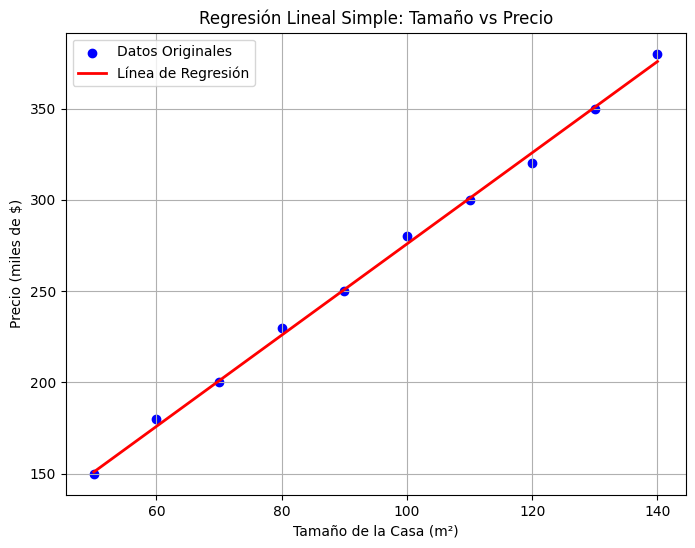

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Preparar los datos (Simulados)
# X: Tamaño de la casa en metros cuadrados (Variable independiente/Predictora)
# Se usa .reshape(-1, 1) para que scikit-learn lo acepte como una característica
X = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140]).reshape(-1, 1)

# y: Precio de la casa en miles de dólares (Variable dependiente/Objetivo)
y = np.array([150, 180, 200, 230, 250, 280, 300, 320, 350, 380])

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 3. Inicializar y entrenar el modelo de Regresión Lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# 4. Realizar predicciones sobre el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# 5. Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Resultados del Modelo ---")
print(f"Coeficiente (Pendiente 'm'): {modelo_regresion.coef_[0]:.4f}")
print(f"Intercepto ('b'): {modelo_regresion.intercept_:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# --- Ejemplo de predicción para un nuevo punto ---
nuevo_tamano = np.array([[150]]) # 150 m²
prediccion_precio = modelo_regresion.predict(nuevo_tamano)
print(f"\nPredicción de precio para {nuevo_tamano[0][0]} m²: ${prediccion_precio[0]:.2f} mil")

# 6. Visualización de la Regresión (Opcional, pero muy útil)
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos Originales') # Puntos reales
plt.plot(X, modelo_regresion.predict(X), color='red', linewidth=2, label='Línea de Regresión') # Línea de predicción
plt.title('Regresión Lineal Simple: Tamaño vs Precio')
plt.xlabel('Tamaño de la Casa (m²)')
plt.ylabel('Precio (miles de $)')
plt.legend()
plt.grid(True)
# plt.show() # Descomentar para ver el gráfico